In [1]:
try:
    import google.colab  # noqa: F401

    # specify the version of DataEval (==X.XX.X) for versions other than the latest
    %pip install -q dataeval[torch]
except Exception:
    pass

In [2]:
# You will need numpy to be able to handle the data.

# You will only use torchvision to load in the dataset.
# If you already have the data stored on your computer in a numpy friendly manner,
# then feel free to load it directly into numpy arrays.
import torchvision.transforms.v2 as v2
from torchvision import datasets

# Load the classes from DataEval that are helpful for bias
from dataeval.metrics.bias import balance, diversity, metadata_preprocessing, parity

In [3]:
# Download the data and then load it as a torch Tensor.
to_tensor = v2.ToImage()
ds = datasets.VOCDetection(root="./data", year="2011", image_set="train", download=True, transform=to_tensor)

Using downloaded and verified file: ./data/VOCtrainval_25-May-2011.tar
Extracting ./data/VOCtrainval_25-May-2011.tar to ./data


In [4]:
# Verify the size of the loaded dataset
len(ds)

5717

In [5]:
# Check the label structure
ds[0][1]

{'annotation': {'folder': 'VOC2011',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

In [6]:
metadata = metadata_preprocessing(
    raw_metadata=(d[1] for d in ds),
    class_labels="name",
    continuous_factor_bins={"width": 10, "height": 10, "xmin": 10, "ymin": 10, "xmax": 10, "ymax": 10},
    exclude=["folder", "filename", "annotation"],
)

/dataeval/src/dataeval/utils/metadata.py:128: UserWarning: Dropping nested list found in '('annotation', 'object', 'part')'.
  warnings.warn(f"Dropping nested list found in '{parent_keys + (k, )}'.")


In [7]:
bal = balance(metadata)

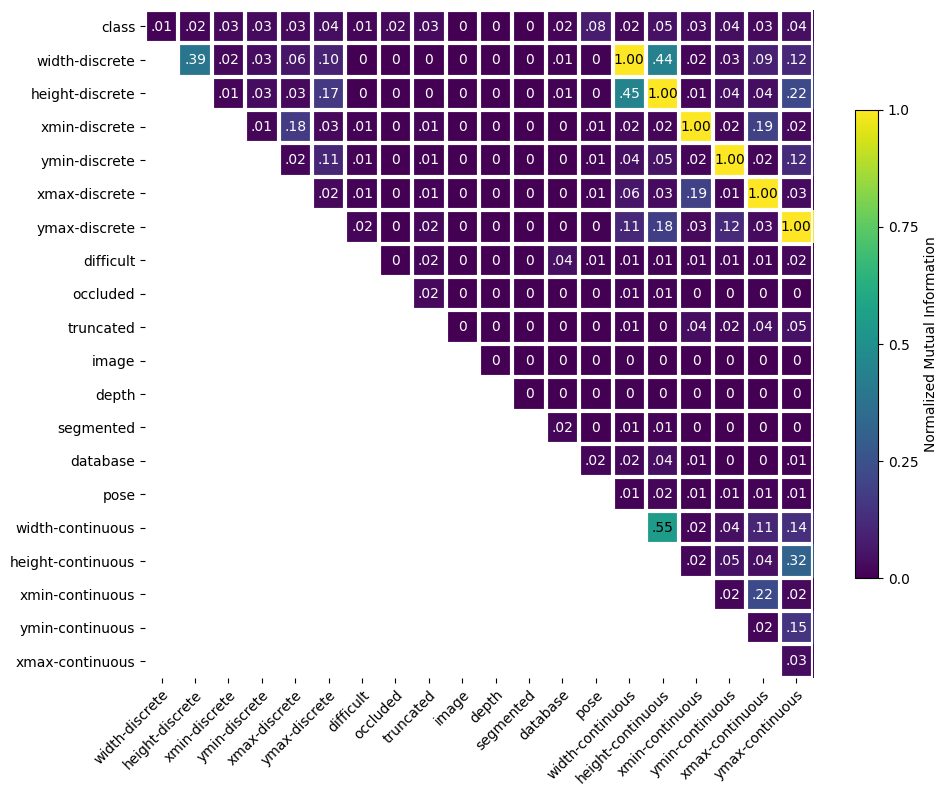

In [8]:
_ = bal.plot()

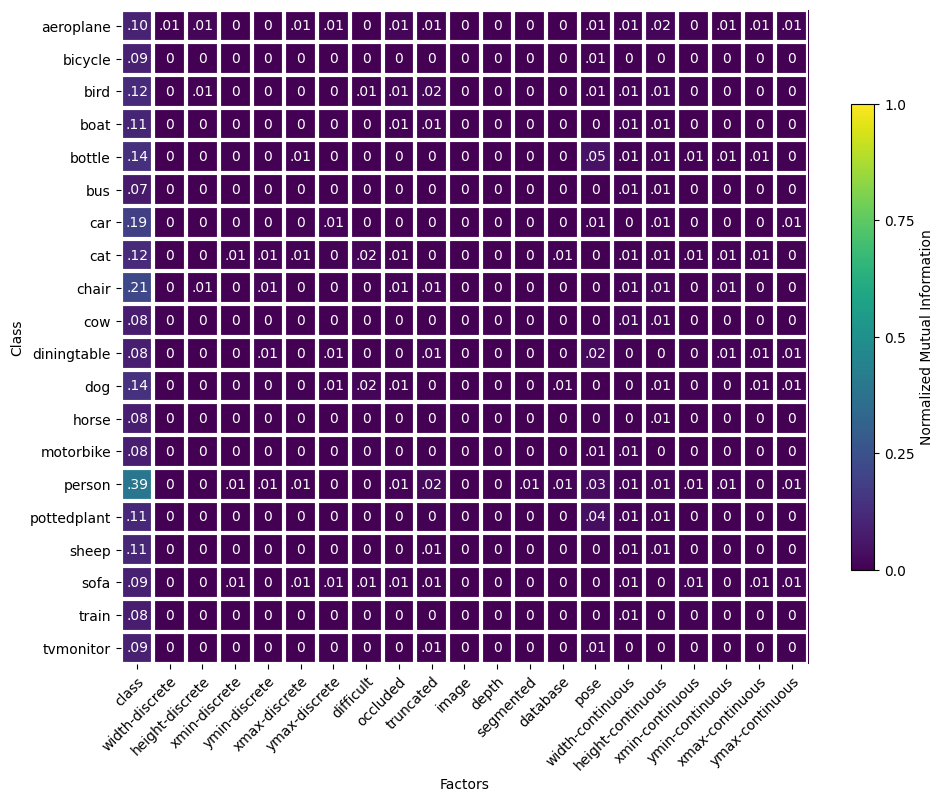

In [9]:
_ = bal.plot(plot_classwise=True)

In [10]:
div = diversity(metadata)

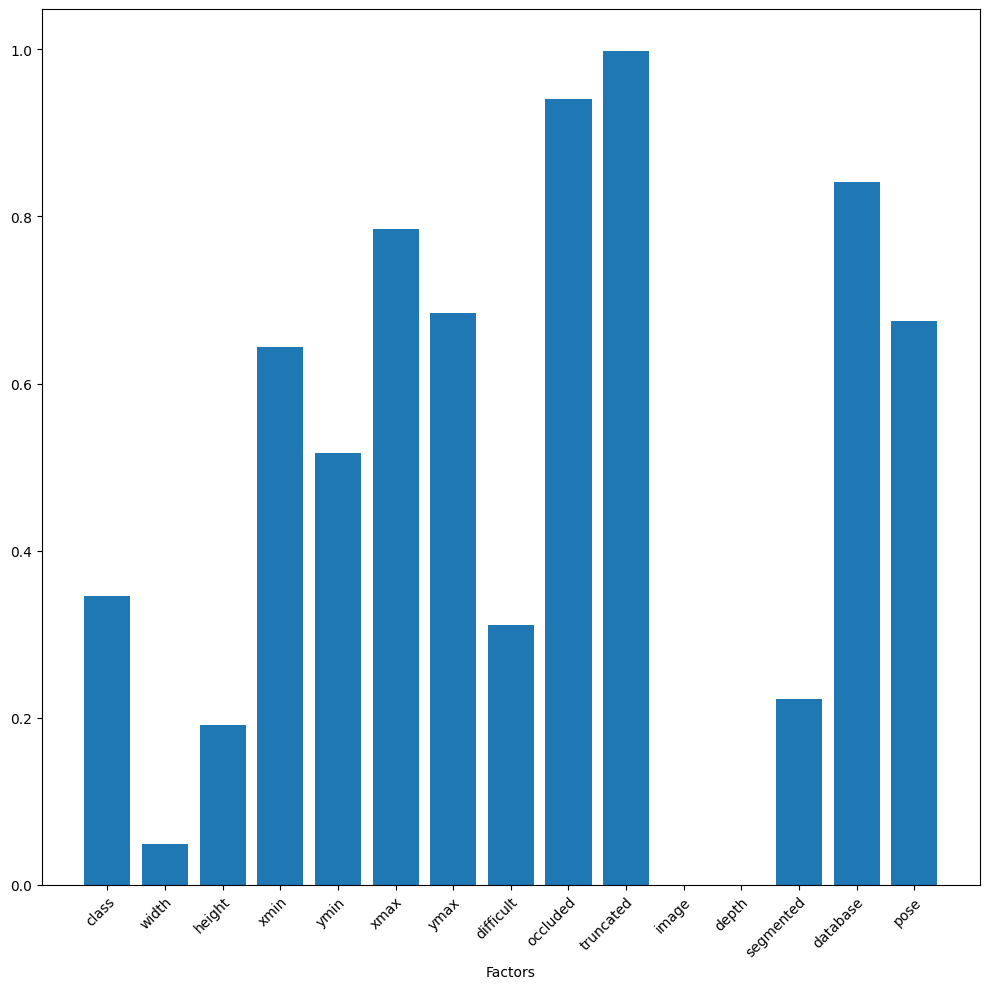

In [11]:
_ = div.plot()

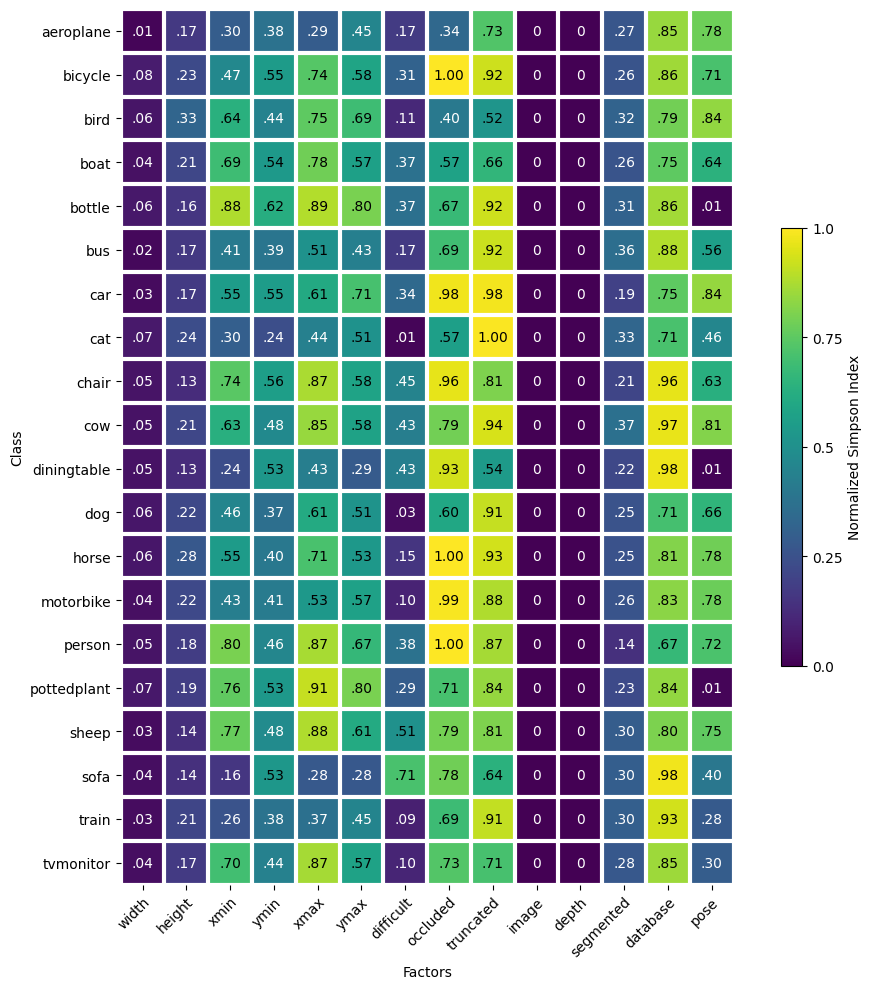

In [12]:
_ = div.plot(plot_classwise=True)

In [13]:
par = parity(metadata)

/dataeval/src/dataeval/metrics/bias/parity.py:315: UserWarning: The following factors did not meet the recommended 5 occurrences for each value-label combination. 
            Recommend rerunning parity after adjusting the following factor-value-label combinations: 
width - value 1 - label bottle: 1 occurrences
	value 2 - label bottle: 3 occurrences
		label person: 3 occurrences
	value 3 - label sofa: 2 occurrences
	value 4 - label bird: 1 occurrences
		label bottle: 2 occurrences
		label bus: 2 occurrences
		label car: 2 occurrences
		label cat: 3 occurrences
		label chair: 4 occurrences
		label cow: 1 occurrences
		label motorbike: 2 occurrences
		label sofa: 1 occurrences
		label train: 1 occurrences
		label tvmonitor: 2 occurrences
	value 5 - label aeroplane: 1 occurrences
		label bicycle: 2 occurrences
		label bottle: 3 occurrences
		label chair: 2 occurrences
		label diningtable: 1 occurrences
		label horse: 4 occurrences
		label sofa: 3 occurrences
		label train: 3 occurrences
	

In [14]:
for key, score, value in zip(par.metadata_names or [], par.score, par.p_value):
    print(f"{key:>9} - {round(score, 2):>7} : {round(value, 2):>3}")

    width -  598.98 : 0.0
   height - 1282.63 : 0.0
     xmin -  1827.7 : 0.0
     ymin - 2139.38 : 0.0
     xmax - 1869.98 : 0.0
     ymax - 2595.41 : 0.0
difficult -  529.53 : 0.0
 occluded - 1166.67 : 0.0
truncated - 1413.02 : 0.0
    image -     0.0 : 1.0
    depth -     0.0 : 1.0
segmented -  158.47 : 0.0
 database -  990.93 : 0.0
     pose -  4732.1 : 0.0
